by [scheinmensch](https://github.com/scheinmensch) and [Krisztina-1984](https://github.com/krisztina-1984)

# Airbnb in Barcelona

Barcelona suffers from over-tourism and in particular has declared war on the mass supply of short-term stay accommodation. Short-term stays are overnight visits of less than or equal to 31 days.

**Strict regulations apply in Barcelona:**
- Any provider offering short-term stay accommodation requires a license.
- The license number must be stated in each offer.
- A license is valid for exactly one accommodation.

**Commercial hosts:**
- Hosts who offer accommodation on a permanent basis and for profit or it's their main source of income


## Focus of this EDA
- get some general insights:
    - types of accommodations
    - host types
    - minimum stay
    - prices
- get insights on licenses:
    - do all short-term offers have a license as required?
    - are licenses reused for multiple listings?
- get insights on hosts:
    - what's the difference between these hose types?
    - are there many private hosts who seem to operate commercially?


# EDA

In [1]:
# import basic packages 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# set color schemes for plots
c =['#F2CC8F','#E07A5F', '#81B29A', '#F4F1DE', '#3D405B']
c2 = ['#8e9aaf', '#919db1', '#949fb3', '#97a2b5', '#9aa5b8', '#9da8ba', '#a0aabb', '#a3adbe', '#a7b1c1', '#abb4c4', '#afb7c6', '#b3bbca', '#b9c0cd', '#bdc4d0', '#c0c7d3', '#c6ccd7', '#ced3dc']
c3 = ['#efd3d7', '#ecccd0', '#eac6cb', '#e9c2c7', '#e7bcc2', '#e5b7bd', '#e3b1b8', '#e1aeb5', '#dfa7af', '#dea3ab', '#dc9fa8', '#da9aa3', '#d8949e', '#d7929c']
plt.style.use('default')

In [2]:
# load data (data from Inside Airbnb and selfscraped data)

bcn_orginal = pd.read_csv('../data/listings_bcn.csv')
scraped = pd.read_csv('../data/airbnb2.csv')

In [3]:
# rename column in scraped dataset
scraped.rename(columns = {'url':'listing_url'}, inplace = True)

In [4]:
# merge both datasets based on listing URL
bcn_new=bcn_orginal.merge(scraped, on='listing_url', how='outer')

In [5]:
# drop unnecessary column
bcn_new = bcn_new.drop(['Unnamed: 0'], axis=1)

## BASICS

In [6]:
# get basic info about missing values and data types
bcn_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15655 entries, 0 to 15654
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            15655 non-null  int64  
 1   listing_url                                   15655 non-null  object 
 2   scrape_id                                     15655 non-null  int64  
 3   last_scraped                                  15655 non-null  object 
 4   source                                        15655 non-null  object 
 5   name                                          15646 non-null  object 
 6   description                                   15569 non-null  object 
 7   neighborhood_overview                         9204 non-null   object 
 8   picture_url                                   15655 non-null  object 
 9   host_id                                       15655 non-null 

In [7]:
# check for missing values
bcn_new.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               3479
host_type                                       4201
Length: 76, dtype: int64

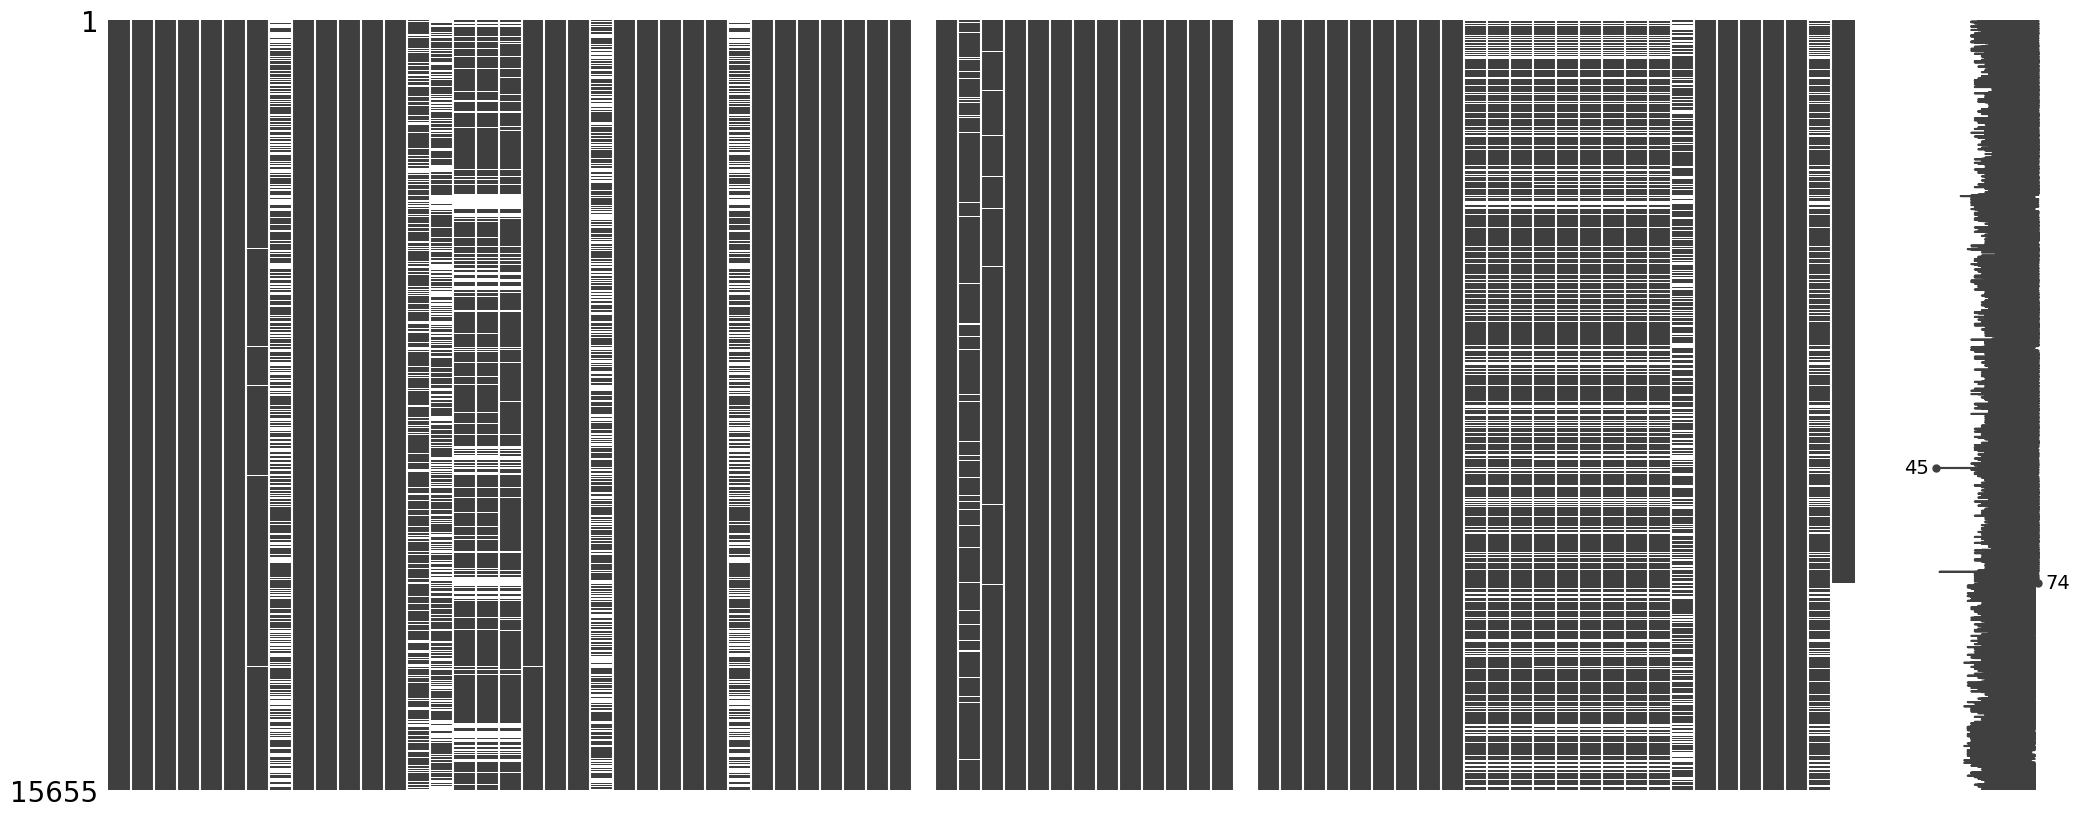

In [8]:
# check for patterns of missing values
import missingno as msno
msno.matrix(bcn_new);

In [9]:
# get basic statistics
bcn_new.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.565500e+04,1.565500e+04,1.565500e+04,15653.000000,15653.000000,15655.000000,15655.000000,15655.000000,0.0,15098.000000,...,12089.000000,12084.000000,12090.000000,12084.000000,12085.000000,15655.000000,15655.000000,15655.000000,15655.000000,12176.000000
mean,1.823385e+17,2.023031e+13,1.450517e+08,33.219575,47.700569,41.391943,2.167214,3.484510,NaN,1.758511,...,4.581542,4.709420,4.709391,4.747661,4.467860,24.163462,21.142510,2.856404,0.084063,1.299759
std,3.126641e+17,0.000000e+00,1.555632e+08,75.886992,122.550600,0.013936,0.017259,2.172102,NaN,1.051358,...,0.518338,0.456223,0.467022,0.371416,0.537626,46.168220,45.881018,11.617766,0.789422,1.747771
min,1.867400e+04,2.023031e+13,3.073000e+03,1.000000,1.000000,41.352608,2.091590,0.000000,NaN,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.891816e+07,2.023031e+13,9.171437e+06,1.000000,2.000000,41.381040,2.157340,2.000000,NaN,1.000000,...,4.440000,4.640000,4.630000,4.670000,4.310000,1.000000,0.000000,0.000000,0.000000,0.210000
50%,3.864140e+07,2.023031e+13,7.067177e+07,6.000000,8.000000,41.389740,2.168246,3.000000,NaN,1.000000,...,4.720000,4.850000,4.850000,4.850000,4.580000,5.000000,2.000000,0.000000,0.000000,0.770000
75%,5.563748e+17,2.023031e+13,2.651478e+08,28.000000,39.000000,41.401295,2.177460,4.000000,NaN,2.000000,...,4.920000,5.000000,5.000000,5.000000,4.790000,23.000000,19.000000,1.000000,0.000000,1.900000
max,8.462300e+17,2.023031e+13,5.049885e+08,1817.000000,3639.000000,41.459560,2.227710,16.000000,NaN,20.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,241.000000,241.000000,120.000000,12.000000,47.160000


In [10]:
# see all column names
bcn_new.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [11]:
# drop some irrelevant or redundant colums
bcn = bcn_new.drop(['scrape_id', 'last_scraped', 'source', 'description', 'neighborhood_overview', 'picture_url', 'host_listings_count', 'host_total_listings_count', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'calendar_last_scraped', 'neighbourhood',
       'neighbourhood_cleansed', ], axis=1)

In [12]:
# drop bathrooms column since it only contains NaN values
bcn = bcn.drop(['bathrooms', 'calendar_updated'], axis=1)

## PRICES

First we have to change the data type of the prices column. It was categorical, but we need numerical data in order to apply statistics.

In [13]:
bcn['price'] = bcn['price'].str[1:]
bcn['price'] = bcn['price'].str.replace(',','')
bcn['price'] = pd.to_numeric(bcn['price'])

In [14]:
bcn['price'].describe()

count    15655.000000
mean       155.644011
std        966.108173
min          0.000000
25%         50.000000
50%         99.000000
75%        164.000000
max      90000.000000
Name: price, dtype: float64

<Axes: >

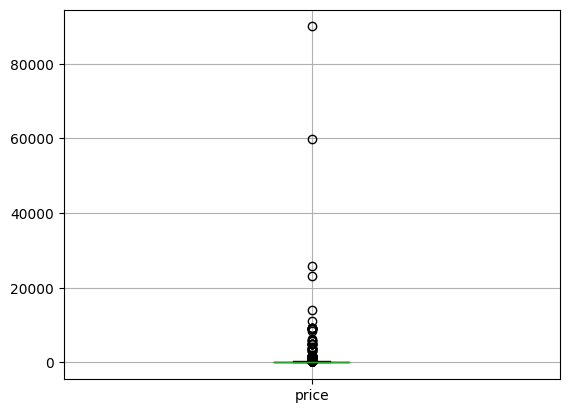

In [15]:
# check for outliers
bcn.boxplot(column='price')

We can see that there are exteme outliers. Why would an accommodation cost 20.000 or even 90.000 Euro per night? For the analysis we'll remove the outliers with the IQR method.

In [20]:
# replace price outliers with NaN (IQR method)

for x in ['price']:
    q75, q25 = np.percentile(bcn.loc[:,x],[75,25])
    intr_qr = q75-q25
    maxp = q75+(1.5*intr_qr)
    minp = q25-(1.5*intr_qr)
    
    bcn.loc[bcn[x] < minp,x] = np.nan
    bcn.loc[bcn[x] > maxp,x] = np.nan
    
bcn['price'].isnull().sum()
bcn['price'] = bcn['price'].dropna(axis=0)

In [17]:
# remove rows with missing values in prices column after applying IQR method
bcn = bcn[bcn.price.notnull()]

In [21]:
bcn['price'].describe()

count    14605.000000
mean       104.691065
std         68.052127
min          0.000000
25%         49.000000
50%         90.000000
75%        149.000000
max        301.000000
Name: price, dtype: float64

This looks more realistic!

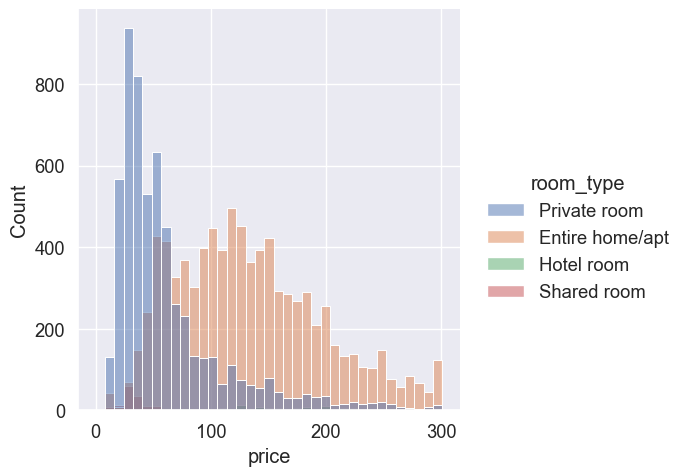

In [29]:
# plot price distribution
sns.set(style="darkgrid", font_scale=1.2)
sns.displot(data=bcn, x="price", hue='room_type', kind='hist')

## ROOM TYPES

<Axes: ylabel='room_type'>

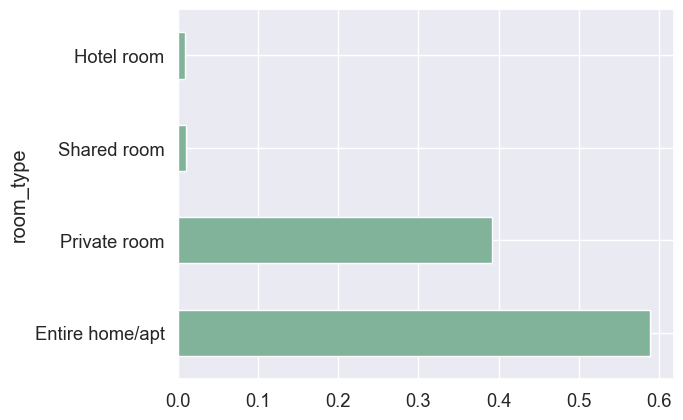

In [26]:
# check distribution of room types
bcn['room_type'].value_counts(normalize=True).sort_values(ascending=False).plot(kind='barh',color='#81B29A')

By far, entire homes are the most common roomtype!

## POPULAR NEIGHBORHOODS

<Axes: ylabel='neighbourhood_group_cleansed'>

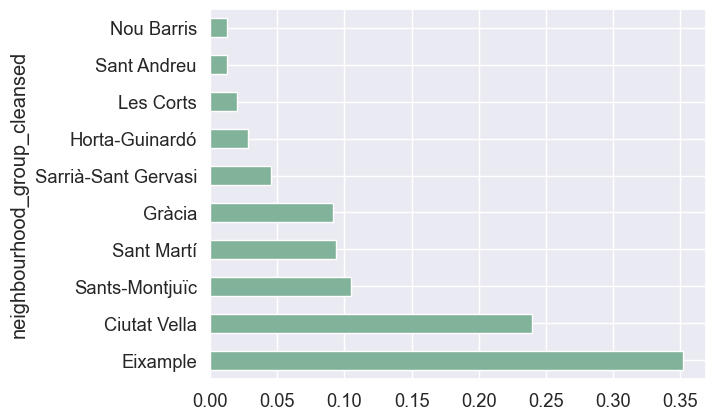

In [30]:
bcn['neighbourhood_group_cleansed'].value_counts(normalize=True).sort_values(ascending=False).plot(kind='barh', color='#81B29A')

Eixample and old city center are most popular.

## LICENSES

We would like to get an overview of licenses. We are interested in whether licenses have the right format and whether they are used more than once. (Actually: one license per property)

In [31]:
# check how many listings specify a license
bcn_new['license'].isnull().sum()

4813

In [33]:
# create an array with all licenses used more than once in the dataset

duplicate_license = bcn[bcn.duplicated('license', keep=False)].copy()
duplicate_license = duplicate_license['license'].dropna()
duplicate_license_array = duplicate_license.unique()
arr = duplicate_license_array[duplicate_license_array != 'Exempt']

In [38]:
# function that can be applied to the array. It will check each license number if it has a plausible format and then add it to an empty list.
def license_duplicates(array):
    new_arr = []
    for license in array:
        if 'HUTB' in license:
            new_arr.append(license)
        elif 'HB' in license:
            new_arr.append(license)
        elif 'AJ' in license:
            new_arr.append(license)
    return new_arr

In [39]:
# apply function
license_duplicates = license_duplicates(arr)

In [40]:
# fill all missing values in license column with "no license"
bcn['license'] = bcn['license'].fillna('no license')

In [41]:
# function that can be applied to the dataset, will add an new column with the license status
def is_valid_license(license):
    if license in license_duplicates:
        return 'reuse'
    if 'HUTB' in license:
        return 'ok'
    if 'HB' in license:
        return 'ok'
    if 'AJ' in license:
        return 'ok'
    elif 'exempt' in license.lower():
        return 'claims exempt'
    else:
        return 'no license'

In [42]:
# apply function 
bcn['status_license'] = bcn.apply(lambda row: is_valid_license(row['license']), axis=1)

<Axes: ylabel='status_license'>

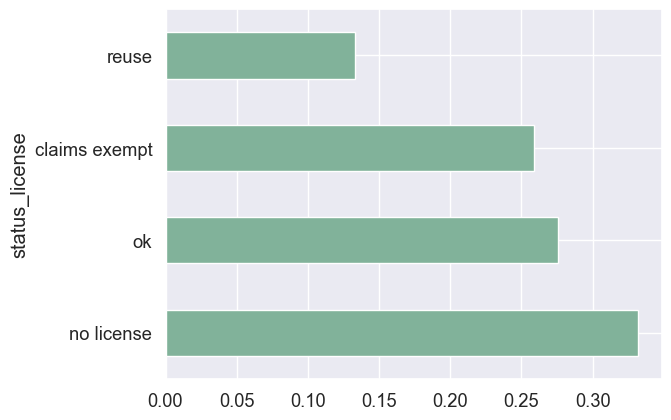

In [44]:
# show distribution of license status
bcn['status_license'].value_counts(normalize=True).sort_values(ascending=False).plot(kind='barh', color='#81B29A')

In [56]:
bcn['status_license'].value_counts(normalize=True)

status_license
no license       0.331822
ok               0.275932
claims exempt    0.259016
reuse            0.133230
Name: proportion, dtype: float64

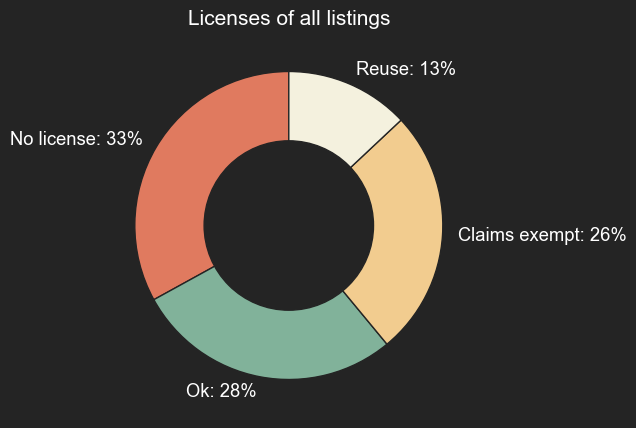

In [68]:
names =['No license: 33%', 'Ok: 28%', 'Claims exempt: 26%', 'Reuse: 13%']
sizes = [33, 28, 26, 13]
fig = plt.figure()
fig.set_size_inches(8,5)
fig.patch.set_facecolor('#242424')
plt.rcParams['text.color'] = 'white'
plt.rcParams
my_circle=plt.Circle( (0,0), 0.55, color='#242424')
plt.pie(x=sizes, labels=names, colors=['#E07A5F', '#81B29A', '#F2CC8F', '#F4F1DE','#3D405B'], startangle=90, wedgeprops={"edgecolor":'#242424'})
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title(
    label="Licenses of all listings", 
    fontdict={"fontsize":15})
plt.show()

Most listings do not have a valid license. We also see many listings claiming exempt and quite some reusing the same license number for multiple listings.

## SHORT-TERM STAY OFFERS

How many listings offer short-term stays?

In [61]:
# write function to add new column
def short_term(row):
    if row['minimum_nights'] > 31:
        return 'Long term stays only'
    else:
        return 'Short term stays'

In [62]:
# apply function
bcn['short_term'] = bcn.apply(lambda row: short_term(row), axis=1)

In [63]:
# show distribution
bcn['short_term'].value_counts(normalize=True)

short_term
Short term stays        0.807429
Long term stays only    0.192571
Name: proportion, dtype: float64

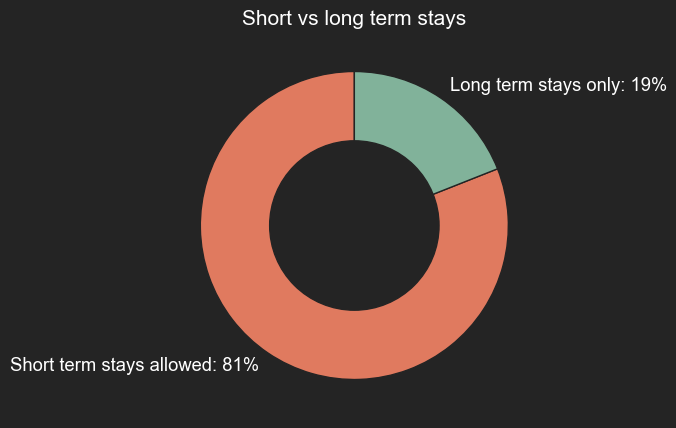

In [64]:
#plot
names =['Short term stays allowed: 81%', 'Long term stays only: 19%']
sizes = [81,19]
fig = plt.figure()
fig.set_size_inches(8,5)
fig.patch.set_facecolor('#242424')
plt.rcParams['text.color'] = 'white'
plt.rcParams
my_circle=plt.Circle( (0,0), 0.55, color='#242424')
plt.pie(x=sizes, labels=names, colors=['#E07A5F', '#81B29A'], startangle=90, wedgeprops={"edgecolor":'#242424'})
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title(
    label="Short vs long term stays", 
    fontdict={"fontsize":15})
plt.show()

81% of the listings allow short-term stays.

## LICENSES IN SHORT-TERM STAY OFFERS

Since a license is only mandatory for short-term stay offers, we now want to check only those listings which offer a minimum stay of less than or equal to 31 days.

In [65]:
# create dataframe with listings that offer short-term stays
short_term_stays = bcn.loc[bcn['minimum_nights'] < 32]

In [66]:
# show distribtion of license status
short_term_stays['status_license'].value_counts(normalize=True)

status_license
ok               0.338725
claims exempt    0.250147
no license       0.248973
reuse            0.162155
Name: proportion, dtype: float64

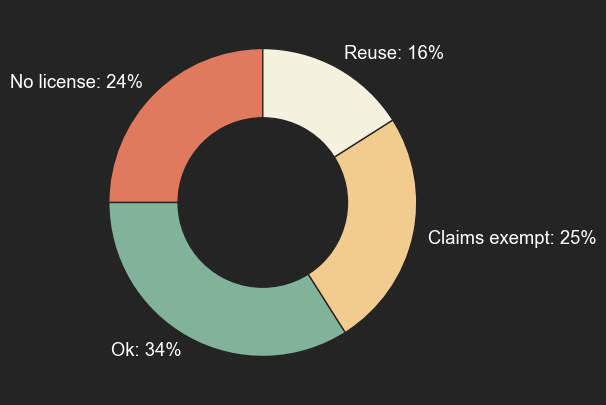

In [67]:
# plot
names =['No license: 24%', 'Ok: 34%', 'Claims exempt: 25%', 'Reuse: 16%']
sizes = [25, 34, 25, 16]
fig = plt.figure()
fig.set_size_inches(8,5)
fig.patch.set_facecolor('#242424')
plt.rcParams['text.color'] = 'white'
plt.rcParams
my_circle=plt.Circle( (0,0), 0.55, color='#242424')
plt.pie(x=sizes, labels=names, colors=['#E07A5F', '#81B29A', '#F2CC8F', '#F4F1DE','#3D405B'], startangle=90, wedgeprops={"edgecolor":'#242424'})
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

## LISTINGS PER HOST

In [46]:
# add a new column with aggregated number: How many listings does the host have in total?
bcn['total_listings'] = bcn.groupby('host_id')['id'].transform('size')

In [47]:
# function to categorize each listing according to the host's total listings
def multi_listings(listings):
    if listings == 1:
        return 'single listing'
    if listings > 1 and listings < 4:
        return '2-3 listings'
    if listings > 3 and listings < 11:
        return '4-10 listings'
    if listings > 10:
        return 'More than 10 listings'

In [48]:
# apply function
bcn['multi_listings'] = bcn.apply(lambda row: multi_listings(row['total_listings']), axis=1)

<Axes: ylabel='multi_listings'>

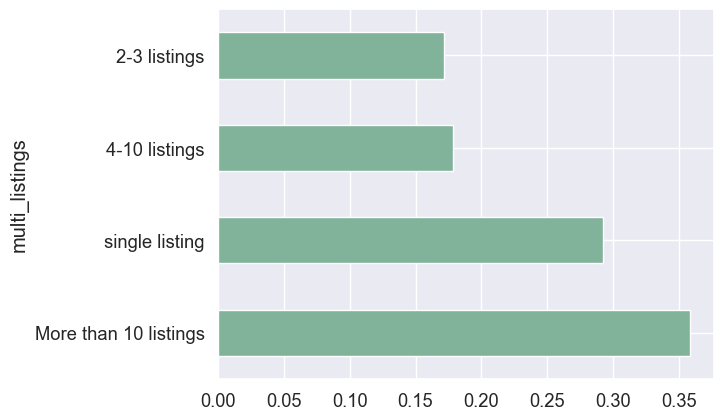

In [50]:
# show distribution of multi listings
bcn['multi_listings'].value_counts(normalize=True).sort_values(ascending=False).plot(kind='barh', color='#81B29A')

Most listings are from hosts that have more than 10 accommodations on offer!

EDA ON HOSTS

In [43]:
hosts = bcn.groupby(['host_id', 'host_name']).agg(listings = ('id', 'count'))

In [44]:
hosts.sort_values(by='listings', ascending=False)

,,listings
host_id,host_name,
346367515,Ukio,241
32037490,SweetInn,178
299462,Stay U-Nique,127
158023606,Habitat Apartments,122
1391607,Aline I Andrea,121
...,...,...
35365408,Emanuel,1
35358773,Joanna,1
35327702,Bahram,1


In [49]:
commercial = bcn.loc[bcn['host_type'] == 'commercial']
private = bcn.loc[bcn['host_type'] == 'private']

In [50]:
reuse = bcn[(bcn['status_license'] == 'reuse') & (bcn['room_type'] == 'Entire home/apt')]

<Axes: ylabel='multi_listings'>

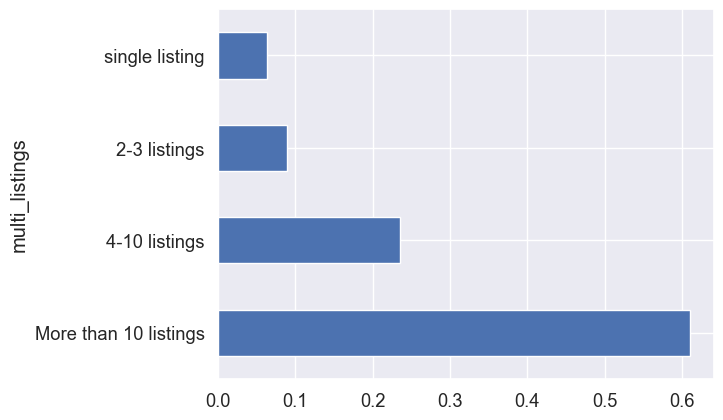

In [51]:
commercial['multi_listings'].value_counts(normalize=True).sort_values(ascending=False).plot(kind='barh')

In [52]:
private['multi_listings'].value_counts(normalize=True)

multi_listings
single listing           0.484049
2-3 listings             0.247728
4-10 listings            0.139191
More than 10 listings    0.129032
Name: proportion, dtype: float64

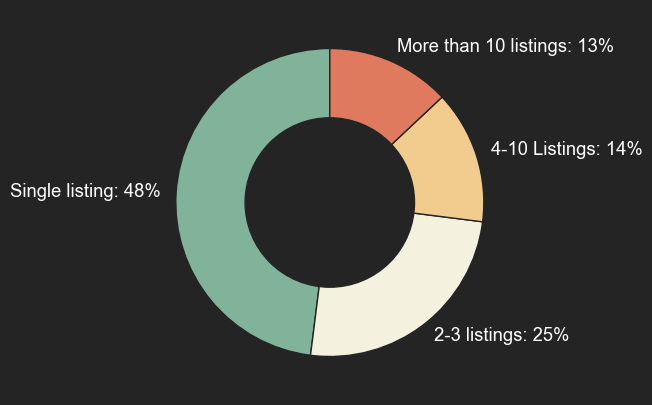

In [74]:
names =['Single listing: 48%', '2-3 listings: 25%', '4-10 Listings: 14%', 'More than 10 listings: 13%']
sizes = [48, 25, 14, 13]
fig = plt.figure()
fig.set_size_inches(8,5)
fig.patch.set_facecolor('#242424')
plt.rcParams['text.color'] = 'white'
plt.rcParams
my_circle=plt.Circle( (0,0), 0.55, color='#242424')
plt.pie(x=sizes, labels=names, colors=['#81B29A', '#F4F1DE', '#F2CC8F','#E07A5F','#3D405B'], startangle=90, wedgeprops={"edgecolor":'#242424'})
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

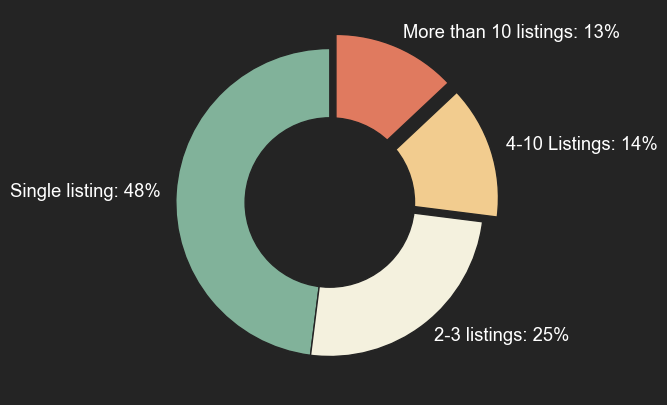

In [75]:
names =['Single listing: 48%', '2-3 listings: 25%', '4-10 Listings: 14%', 'More than 10 listings: 13%']
sizes = [48, 25, 14, 13]
fig = plt.figure()
fig.set_size_inches(8,5)
fig.patch.set_facecolor('#242424')
plt.rcParams['text.color'] = 'white'
plt.rcParams
my_circle=plt.Circle( (0,0), 0.55, color='#242424')
plt.pie(x=sizes, labels=names, colors=['#81B29A', '#F4F1DE', '#F2CC8F','#E07A5F','#3D405B'], startangle=90, wedgeprops={"edgecolor":'#242424'}, explode = (0,0,0.1,0.1))
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

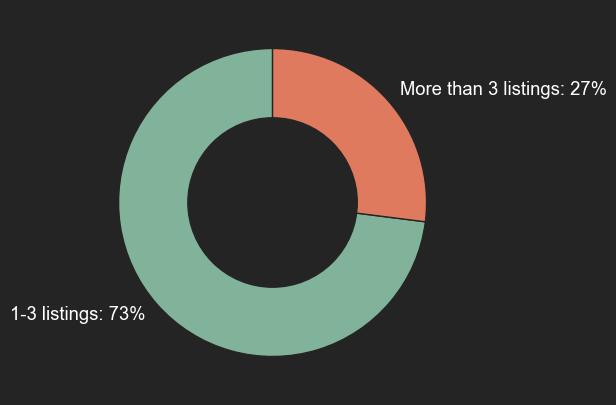

In [78]:
names =['1-3 listings: 73%', 'More than 3 listings: 27%']
sizes = [73,27]
fig = plt.figure()
fig.set_size_inches(8,5)
fig.patch.set_facecolor('#242424')
plt.rcParams['text.color'] = 'white'
plt.rcParams
my_circle=plt.Circle( (0,0), 0.55, color='#242424')
plt.pie(x=sizes, labels=names, colors=['#81B29A','#E07A5F','#3D405B'], startangle=90, wedgeprops={"edgecolor":'#242424'})
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

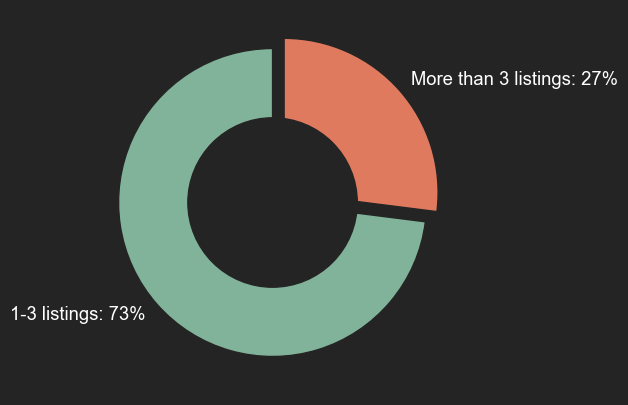

In [79]:
names =['1-3 listings: 73%', 'More than 3 listings: 27%']
sizes = [73,27]
fig = plt.figure()
fig.set_size_inches(8,5)
fig.patch.set_facecolor('#242424')
plt.rcParams['text.color'] = 'white'
plt.rcParams
my_circle=plt.Circle( (0,0), 0.55, color='#242424')
plt.pie(x=sizes, labels=names, colors=['#81B29A','#E07A5F','#3D405B'], startangle=90, wedgeprops={"edgecolor":'#242424'}, explode = (0, 0.1))
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [53]:
commercial['status_license'].value_counts(normalize=True)

status_license
ok               0.394278
no license       0.252792
reuse            0.220263
claims exempt    0.132667
Name: proportion, dtype: float64

In [54]:
private['status_license'].value_counts(normalize=True)

status_license
no license       0.387097
claims exempt    0.369809
ok               0.184103
reuse            0.058991
Name: proportion, dtype: float64

In [63]:
df_license = pd.crosstab(bcn['room_type'], bcn['host_type'], normalize='index').mul(100).round(2)
df_license.head()

host_type,commercial,not_found,private
room_type,,,
Entire home/apt,61.48,0.76,37.76
Hotel room,97.12,0.00,2.88
Private room,22.85,1.40,75.75
Shared room,69.57,2.61,27.83


In [64]:
df_license = pd.crosstab(bcn['host_type'], bcn['room_type'], normalize='index').mul(100).round(2)
df_license.head()

room_type,Entire home/apt,Hotel room,Private room,Shared room
host_type,,,,
commercial,77.93,1.98,18.52,1.57
not_found,44.55,0.00,52.73,2.73
private,43.54,0.05,55.84,0.57


In [65]:
df_license = pd.crosstab(bcn['host_type'], bcn['multi_listings'], normalize='index').mul(100).round(2)
df_license.head()

multi_listings,10 or more listings,2-3 listings,4-10 listings,single listing
host_type,,,,
commercial,61.00,8.99,23.59,6.41
not_found,33.64,24.55,14.55,27.27
private,12.90,24.77,13.92,48.40


In [67]:
private_with_many_listings = bcn[(bcn['total_listings'] > 3) & (bcn['host_type'] == 'private')]
private_with_many_listings.shape

(1505, 64)

In [68]:
df_license = pd.crosstab(bcn['host_type'], bcn['status_license'], normalize='index').mul(100).round(2)
df_license.head()

status_license,claims exempt,no license,ok,reuse
host_type,,,,
commercial,13.27,25.28,39.43,22.03
not_found,47.27,32.73,15.45,4.55
private,36.98,38.71,18.41,5.90


In [69]:
host_types = bcn.groupby(['host_type']).agg(listings = ('id', 'count'), listings_avg = ('total_listings', 'mean'), calculated_host_listings_count = ('calculated_host_listings_count', 'mean'),calculated_host_listings_count_entire_homes = ('calculated_host_listings_count_entire_homes', 'mean'), price = ('price', 'mean'), minimum_nights = ('minimum_nights', 'mean'), number_of_reviews = ('number_of_reviews', 'mean'), rating = ('review_scores_rating', 'mean'), reviews_month =('reviews_per_month', 'mean'))

In [70]:
host_types

,listings,listings_avg,calculated_host_listings_count,calculated_host_listings_count_entire_homes,price,minimum_nights,number_of_reviews,rating,reviews_month
host_type,,,,,,,,,
commercial,5103,38.215951,40.521654,35.981188,139.243582,12.345483,42.029199,4.493831,1.368383
not_found,110,15.463636,16.745455,13.809091,88.618182,15.054545,37.527273,4.498060,2.036716
private,5611,6.062734,6.191944,4.106755,79.684726,17.503654,47.540902,4.568772,1.270780


In [71]:
df_license = pd.crosstab(bcn['host_type'], bcn['host_is_superhost'], normalize='index').mul(100).round(2)
df_license.head()

host_is_superhost,f,t
host_type,,
commercial,84.85,15.15
not_found,90.91,9.09
private,77.85,22.15


In [72]:
df_license = pd.crosstab(bcn['host_type'], bcn['host_identity_verified'], normalize='index').mul(100).round(2)
df_license.head()


host_identity_verified,f,t
host_type,,
commercial,6.23,93.77
not_found,12.73,87.27
private,16.01,83.99


## CLUSTERING

In [74]:
bcn_cluster = bcn.drop(['id', 'listing_url', 'name', 'host_id', 'host_url', 'host_name',
       'host_since', 'host_location',
       'host_response_rate',
       'host_neighbourhood', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities',
       'minimum_minimum_nights', 'maximum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license','reviews_per_month', 'total_listings', 'multi_listings'], axis=1)

In [75]:
bcn_cluster.columns

Index(['host_response_time', 'host_acceptance_rate', 'host_is_superhost',
       'room_type', 'price', 'minimum_nights', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'host_type',
       'status_license', 'short_term'],
      dtype='object')

In [76]:
bcn_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14779 entries, 0 to 15654
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_response_time                            11879 non-null  object 
 1   host_acceptance_rate                          12325 non-null  object 
 2   host_is_superhost                             14778 non-null  object 
 3   room_type                                     14779 non-null  object 
 4   price                                         14779 non-null  float64
 5   minimum_nights                                14779 non-null  int64  
 6   instant_bookable                              14779 non-null  object 
 7   calculated_host_listings_count                14779 non-null  int64  
 8   calculated_host_listings_count_entire_homes   14779 non-null  int64  
 9   calculated_host_listings_count_private_rooms  14779 non-null  int6

In [77]:
bcn_cluster['host_acceptance_rate'] = bcn_cluster['host_acceptance_rate'].str.rstrip("%").astype(float)/100

In [78]:
bcn_cluster['host_response_time'] = bcn_cluster['host_response_time'].fillna('within an hour')

In [79]:
mean_ar = bcn_cluster['host_acceptance_rate'].mean()
mode_mmn = bcn_cluster['minimum_nights'].mode()
mode_mmn

0    1
Name: minimum_nights, dtype: int64

In [80]:
bcn_cluster['host_acceptance_rate'] = bcn_cluster['host_acceptance_rate'].fillna((mean_ar))

In [81]:
bcn_cluster['minimum_nights'] = bcn_cluster['minimum_nights'].fillna(1)

In [82]:
bcn_cluster['host_is_superhost'] = bcn_cluster['host_is_superhost'].fillna('f')

In [83]:
bcn_cluster['host_type'].info()

<class 'pandas.core.series.Series'>
Index: 14779 entries, 0 to 15654
Series name: host_type
Non-Null Count  Dtype 
--------------  ----- 
10824 non-null  object
dtypes: object(1)
memory usage: 747.0+ KB


In [84]:
bcn_cluster = bcn_cluster[bcn_cluster.host_type.notnull()]

In [85]:
bcn_cluster = bcn_cluster[bcn_cluster['host_type']!='not_found']

In [86]:
bcn_cluster.shape

(10714, 14)

In [87]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
bcn_cluster['host_is_superhost'] = le.fit_transform(bcn_cluster['host_is_superhost'])

In [88]:
bcn_cluster['instant_bookable'] = le.fit_transform(bcn_cluster['instant_bookable'])

In [89]:
bcn_cluster_scaled = bcn_cluster.copy()

In [90]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
bcn_cluster_scaled[['price', 'minimum_nights', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'host_acceptance_rate']] = scaler.fit_transform(bcn_cluster_scaled[['price', 'minimum_nights', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'host_acceptance_rate']])

In [91]:
from kmodes.kprototypes import KPrototypes

In [92]:
# cost = []
# K = range(1,9)
# for num_clusters in list(K):
#     kproto = KPrototypes (n_clusters=num_clusters, init = "Cao", n_init = 5, verbose=1)
#     kproto.fit_predict(bcn_cluster, categorical=[0,3,11])
#     cost.append(kproto.cost_)

In [93]:
# cost 6 clusters
K = range(1,9)
cost = [117606.19126621971,
 93747.7062223681,
 81580.14544822637,
 68150.72072175452,
 58679.64240554935,
 46962.24783412709,
 44508.94029991599,
 35295.44332495198]

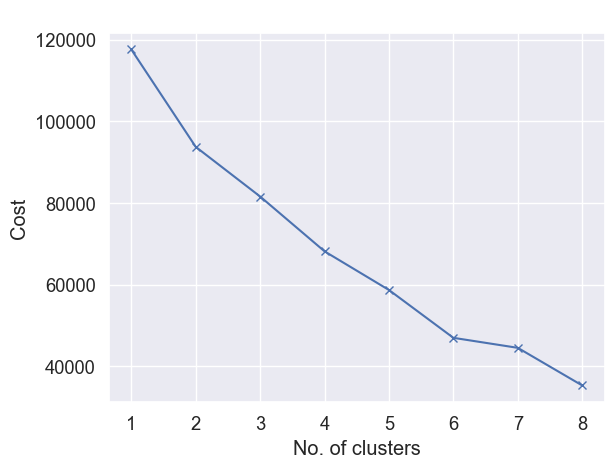

In [94]:
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [95]:
kproto = KPrototypes(n_clusters=6, init='Cao')
clusters = kproto.fit_predict(bcn_cluster_scaled, categorical=[0,3,11,12])

ValueError: could not convert string to float: 'Short term stays'

In [ ]:
clusters.shape

In [ ]:
bcn_cluster.reset_index(drop=True, inplace=True)

In [ ]:
df_cluster = pd.Series(clusters, name='Cluster')
bcn_clustered = pd.concat([bcn_cluster, df_cluster], axis=1)

In [ ]:
bcn_clustered.head()

In [ ]:
bcn_clustered['Segment'] = bcn_clustered['Cluster'].map({0:'First', 1:'Second', 2:'Third', 3: 'Fourth', 4: 'Fifth', 5:'Sixth'})
bcn_clustered['Segment'] = bcn_clustered['Segment'].astype('category')

bcn_clustered.groupby('Segment').agg(
    {'Cluster':'count',
    'host_response_time': lambda x: x.value_counts().index[0],
    'host_acceptance_rate': 'mean',
    'host_is_superhost': lambda x: x.value_counts().index[0],
    'room_type': lambda x: x.value_counts().index[0],
    'price': 'mean',
    'minimum_nights': 'median',
    'instant_bookable': lambda x: x.value_counts().index[0],
    'calculated_host_listings_count': 'median',
    'calculated_host_listings_count_entire_homes': 'median',
    'calculated_host_listings_count_private_rooms': 'median',
    'calculated_host_listings_count_shared_rooms': 'median',
    'status_license': lambda x: x.value_counts().index[0],
    'host_type': lambda x: x.value_counts().index[0]
    }
).reset_index()

In [ ]:
first = bcn_clustered.loc[bcn_clustered['Segment'] == 'First']

In [ ]:
first.head(20)

#### First own idea of categories (before clustering):


**OK:**
- claim commercial, is commercial, everything ok
- claim private, is private, everything ok
- no license or claim exempt, but don't offer short-term-stay (<32 days), therefore ok

**NOT OK:**
- no license or claim exempt, but offers short-term-stay(<32 days), therefore not ok
- claim private, but seemingly commercial
- multiple conditions which are not ok
- reuse of license

#### Categories according to clustering:

**OK:**

- Fifth, Second: commercial, many listings, licenses and short-term
- Fourth: commercial, many listings, no licenses and long-stay (maybe for students)
- Third: commercial, many listings, reuse of licence, rooms, long-term, cheap (hostel for the weekend)
- First: private, no license but long term

**NOT OK:**
- Sixth: private, no license, short term

Learnings from clustering: reuse of license is not necessarily suspicous, but seems to be used by hostels (one license for multiple shared rooms in one property)

# Plots for presentation

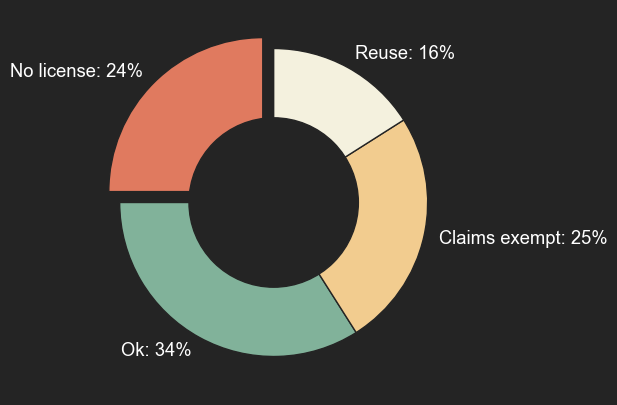

In [83]:
names =['No license: 24%', 'Ok: 34%', 'Claims exempt: 25%', 'Reuse: 16%']
sizes = [25, 34, 25, 16]
fig = plt.figure()
fig.set_size_inches(8,5)
fig.patch.set_facecolor('#242424')
plt.rcParams['text.color'] = 'white'
plt.rcParams
my_circle=plt.Circle( (0,0), 0.55, color='#242424')
plt.pie(x=sizes, labels=names, colors=['#E07A5F', '#81B29A', '#F2CC8F', '#F4F1DE','#3D405B'], startangle=90, wedgeprops={"edgecolor":'#242424'}, explode = (0.1,0,0,0))
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

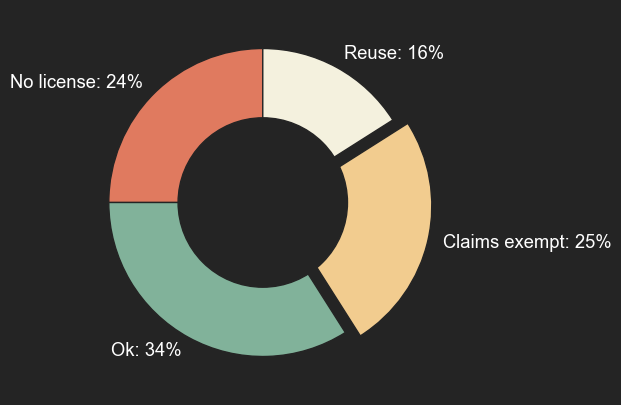

In [85]:
names =['No license: 24%', 'Ok: 34%', 'Claims exempt: 25%', 'Reuse: 16%']
sizes = [25, 34, 25, 16]
fig = plt.figure()
fig.set_size_inches(8,5)
fig.patch.set_facecolor('#242424')
plt.rcParams['text.color'] = 'white'
plt.rcParams
my_circle=plt.Circle( (0,0), 0.55, color='#242424')
plt.pie(x=sizes, labels=names, colors=['#E07A5F', '#81B29A', '#F2CC8F', '#F4F1DE','#3D405B'], startangle=90, wedgeprops={"edgecolor":'#242424'}, explode = (0,0,0.1,0))
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

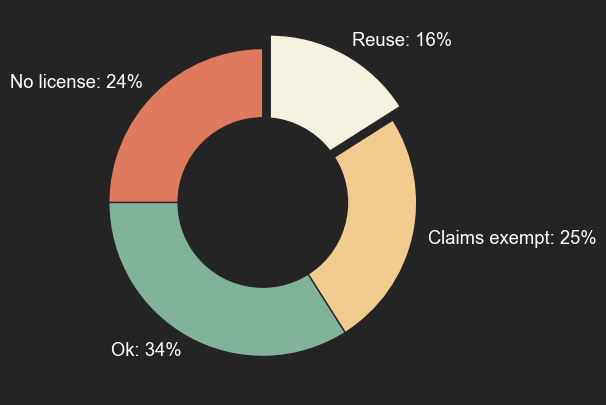

In [86]:
names =['No license: 24%', 'Ok: 34%', 'Claims exempt: 25%', 'Reuse: 16%']
sizes = [25, 34, 25, 16]
fig = plt.figure()
fig.set_size_inches(8,5)
fig.patch.set_facecolor('#242424')
plt.rcParams['text.color'] = 'white'
plt.rcParams
my_circle=plt.Circle( (0,0), 0.55, color='#242424')
plt.pie(x=sizes, labels=names, colors=['#E07A5F', '#81B29A', '#F2CC8F', '#F4F1DE','#3D405B'], startangle=90, wedgeprops={"edgecolor":'#242424'}, explode = (0,0,0,0.1))
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()